In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
import numpy as np

import camb
from camb import model, initialpower
import pandas as pd

In [2]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [3]:
omega_index = 1 # while we debug, we confine our attention to just one value
onh2 = spectra.omega_nu[omega_index]
onh2_str = spectra.omnu_strings[omega_index]

In [4]:
k_massless_list, z_massless_list, p_massless_list, s12_massless_list, \
    k_massive_list, z_massive_list, p_massive_list, s12_massive_list = \
    spectra.boltzmann_battery(onh2, skips=[8])

Redshift is 0.0


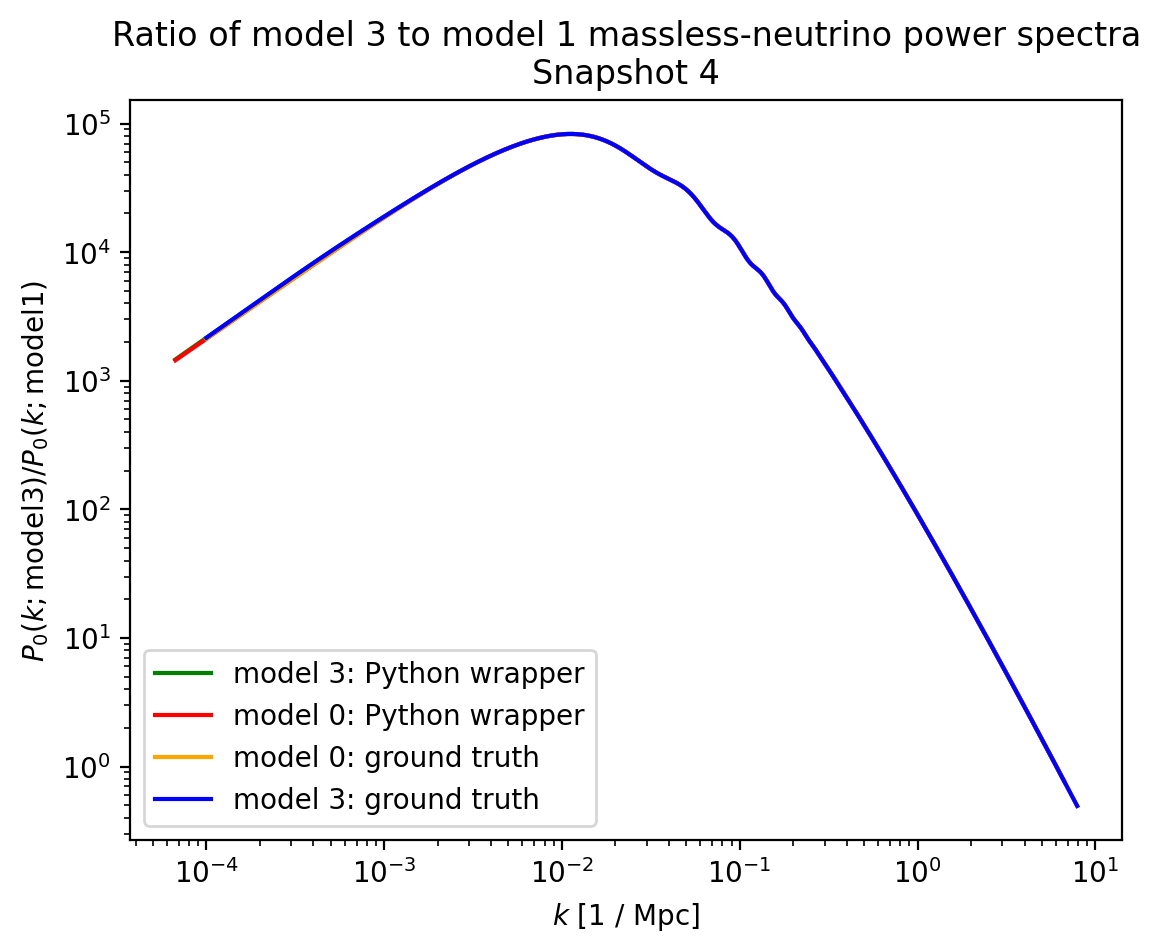

In [5]:
i = 3
z_index = 0
snap_index = 4 - z_index

print("Redshift is", z_massless_list[0][z_index])

baseline_h = spectra.cosm.loc[0]["h"]
baseline_k = k_massless_list[0] * baseline_h
baseline_p = p_massless_list[0][z_index] / baseline_h ** 3

this_h = spectra.cosm.loc[i]["h"]
this_k = k_massless_list[i] * this_h
this_p = p_massless_list[i][z_index] / this_h ** 3

truncated_k, truncated_p, aligned_p = \
    spectra.truncator(baseline_k, baseline_p, this_k,
    this_p, interpolation=this_h != baseline_h)

baseline_k_true = spectra.powernu[onh2_str][0][snap_index]["k"]
baseline_p_true = spectra.powernu[onh2_str][0][snap_index]["P_no"]
this_k_true = spectra.powernu[onh2_str][i][snap_index]["k"]
this_p_true = spectra.powernu[onh2_str][i][snap_index]["P_no"]

plt.plot(truncated_k, aligned_p, c="green", label="model 3: Python wrapper")
plt.plot(truncated_k, truncated_p, c="red", label="model 0: Python wrapper")
plt.plot(baseline_k_true, baseline_p_true, c="orange",
         label="model 0: ground truth")
plt.plot(this_k_true, this_p_true, c="blue", label="model 3: ground truth")
plt.title("Ratio of model 3 to model 1 massless-neutrino power spectra" + \
         "\nSnapshot " + str(snap_index))
plt.ylabel(r"$P_0 (k; \mathrm{model 3}) / P_0 (k; \mathrm{model 1})$")
plt.xlabel(r"$k$ [1 / Mpc]")
plt.xscale("log")
plt.yscale("log")
plt.legend()

Redshift is 0.0


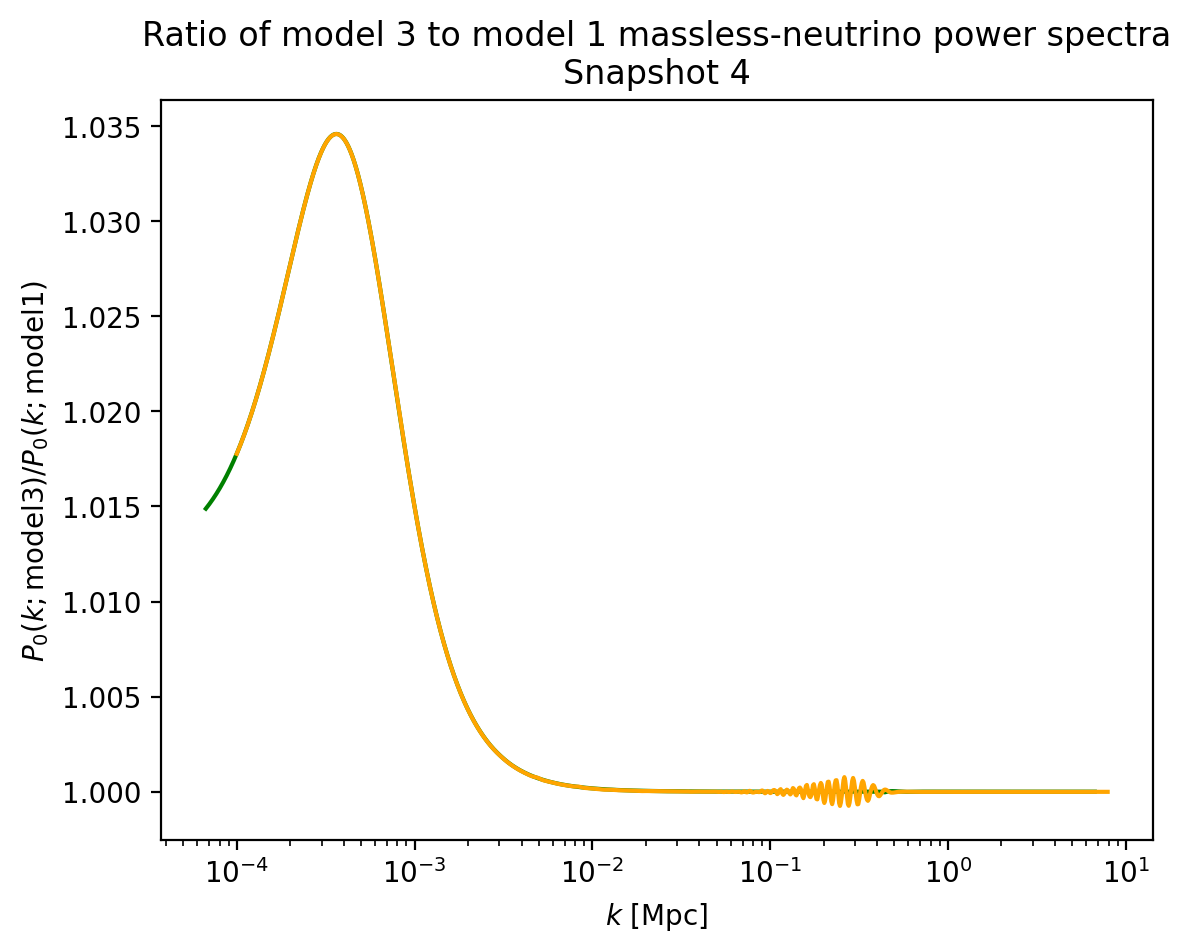

In [6]:
i = 3
z_index = 0
snap_index = 4 - z_index

print("Redshift is", z_massless_list[0][z_index])

baseline_h = spectra.cosm.loc[0]["h"]
baseline_k = k_massless_list[0] * baseline_h
baseline_p = p_massless_list[0][z_index] / baseline_h ** 3

this_h = spectra.cosm.loc[i]["h"]
this_k = k_massless_list[i] * this_h
this_p = p_massless_list[i][z_index] / this_h ** 3

truncated_k, truncated_p, aligned_p = \
    spectra.truncator(baseline_k, baseline_p, this_k,
    this_p, interpolation=this_h != baseline_h)

plt.plot(truncated_k, aligned_p / truncated_p, c="green",
        label="Python wrapper")
#! I don't think we need to do interpolation, since they agree on h.
    # But in case anything weird happens I want to keep this in mind.
plt.plot(spectra.powernu[onh2_str][i][snap_index]["k"],
         spectra.powernu[onh2_str][i][snap_index]["P_no"] / \
         spectra.powernu[onh2_str][0][snap_index]["P_no"],
         c="orange", label="ground truth")
plt.title("Ratio of model 3 to model 1 massless-neutrino power spectra" + \
         "\nSnapshot " + str(snap_index))
plt.ylabel(r"$P_0 (k; \mathrm{model 3}) / P_0 (k; \mathrm{model 1})$")
plt.xlabel(r"$k$ [Mpc]")
plt.xscale("log")

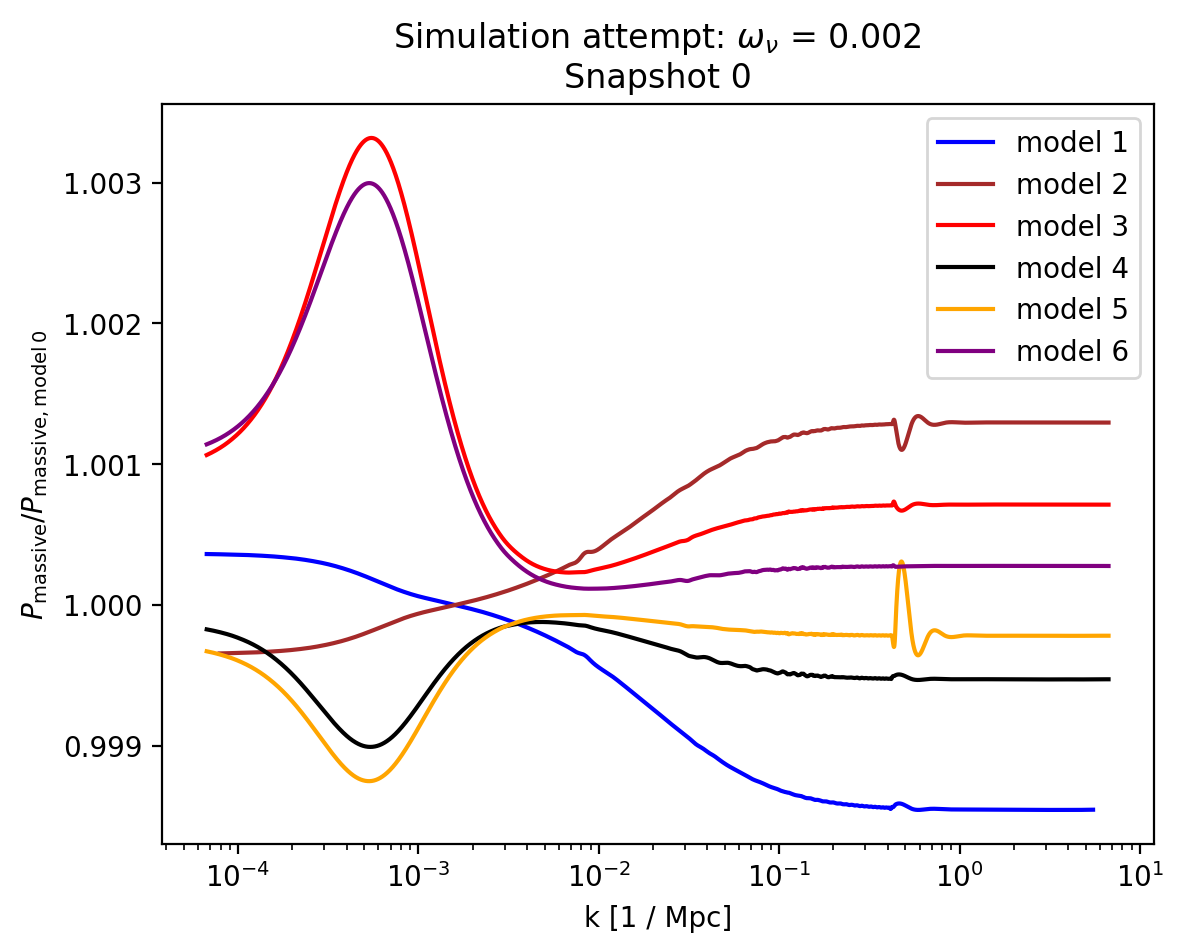

In [7]:
spectra.model_ratios(
    k_massive_list, p_massive_list, 0, "massive",
    r"Simulation attempt: $\omega_\nu$ = " + str(onh2) + "\n" + \
    "Snapshot 0", skips=[7, 8])

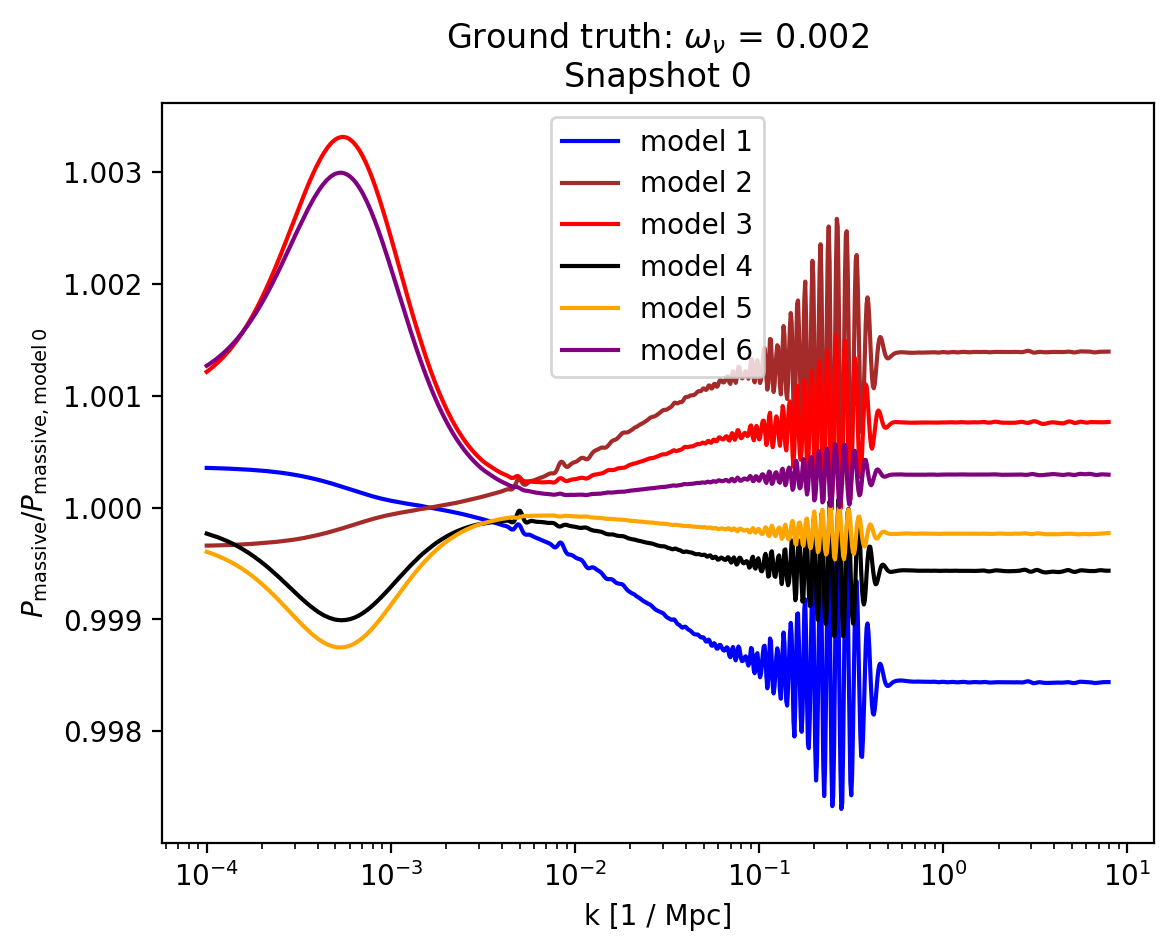

In [8]:
# What was this supposed to look like?
spectra.model_ratios_true(0, onh2_str, massive=True, skips=[7, 8])

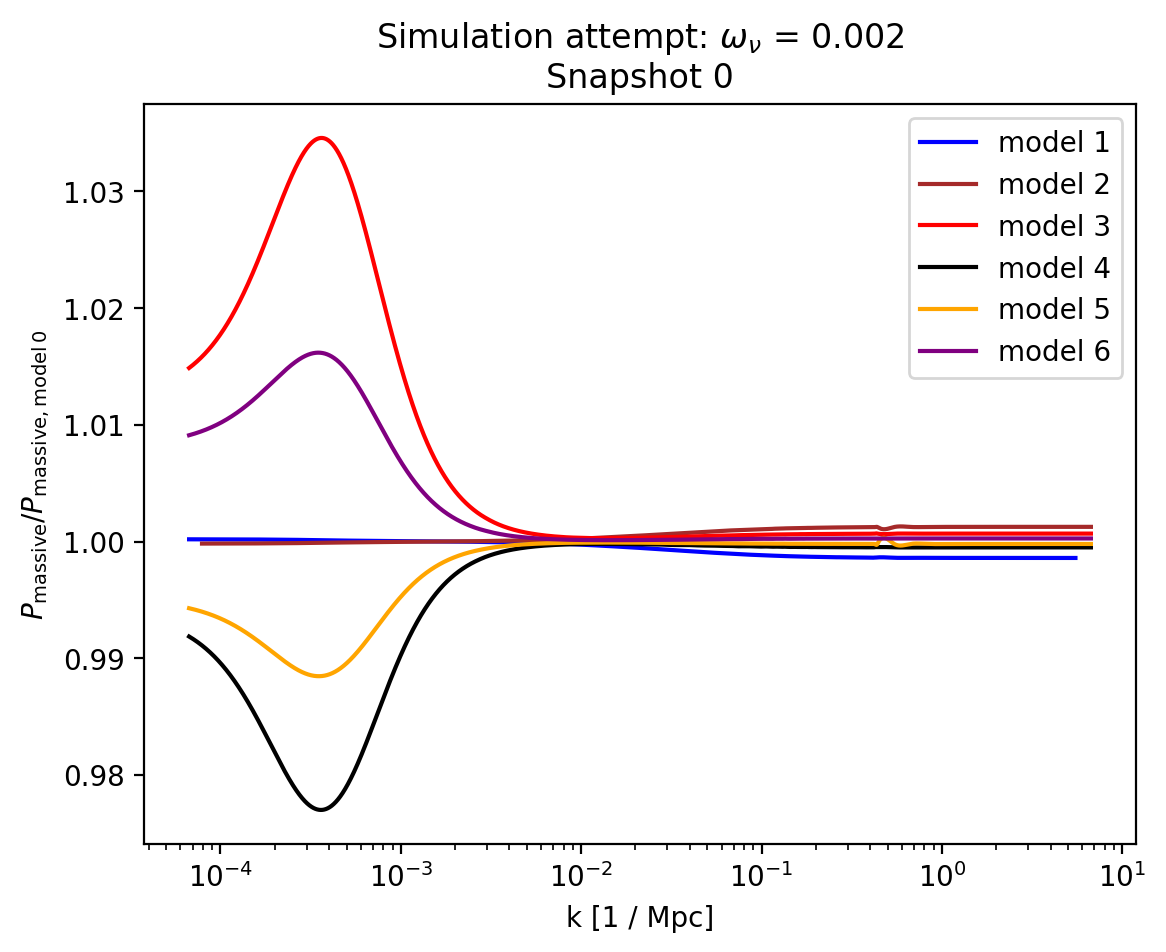

In [9]:
spectra.model_ratios(
    k_massive_list, p_massive_list, 4, "massive",
    r"Simulation attempt: $\omega_\nu$ = " + str(onh2) + "\n" + \
    "Snapshot 0", skips=[7, 8])

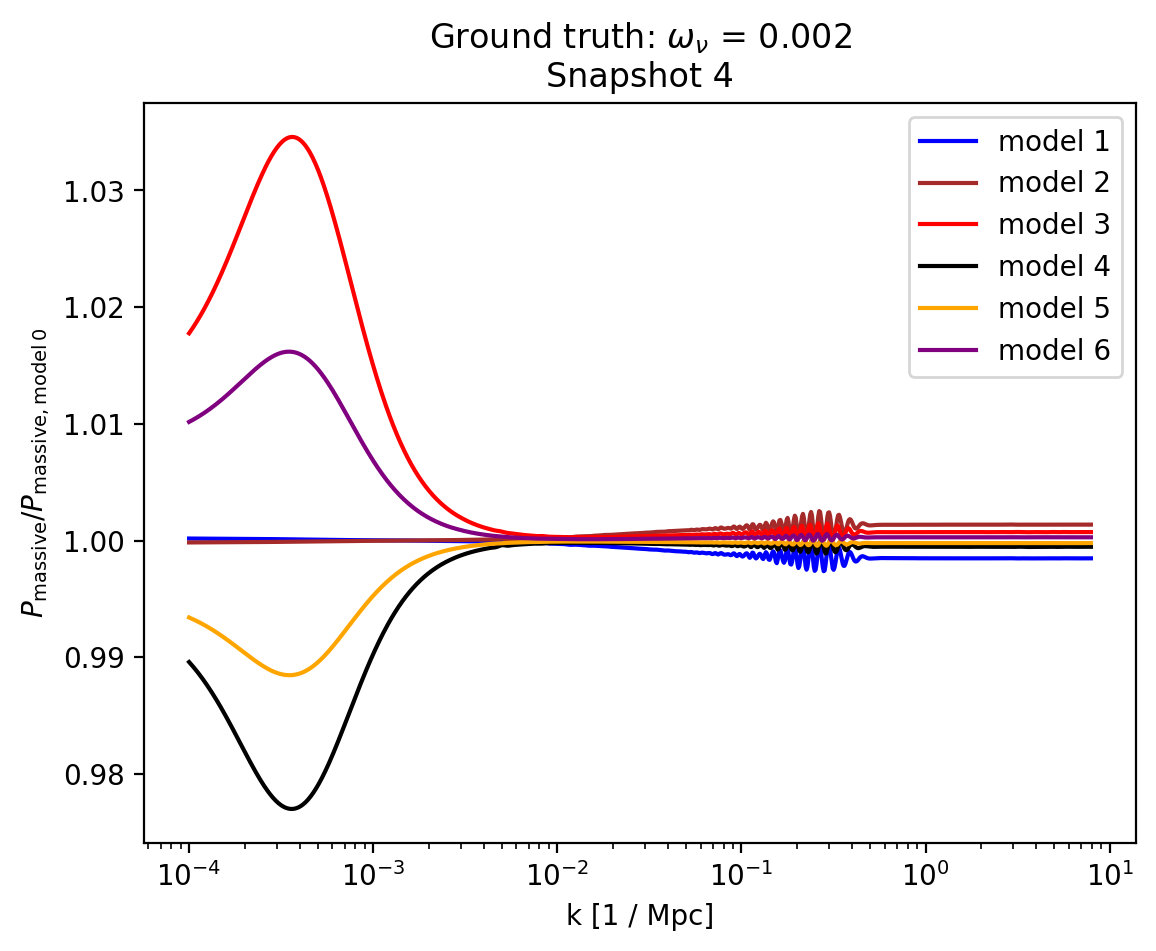

In [10]:
spectra.model_ratios_true(4, onh2_str, massive=True, skips=[7, 8])

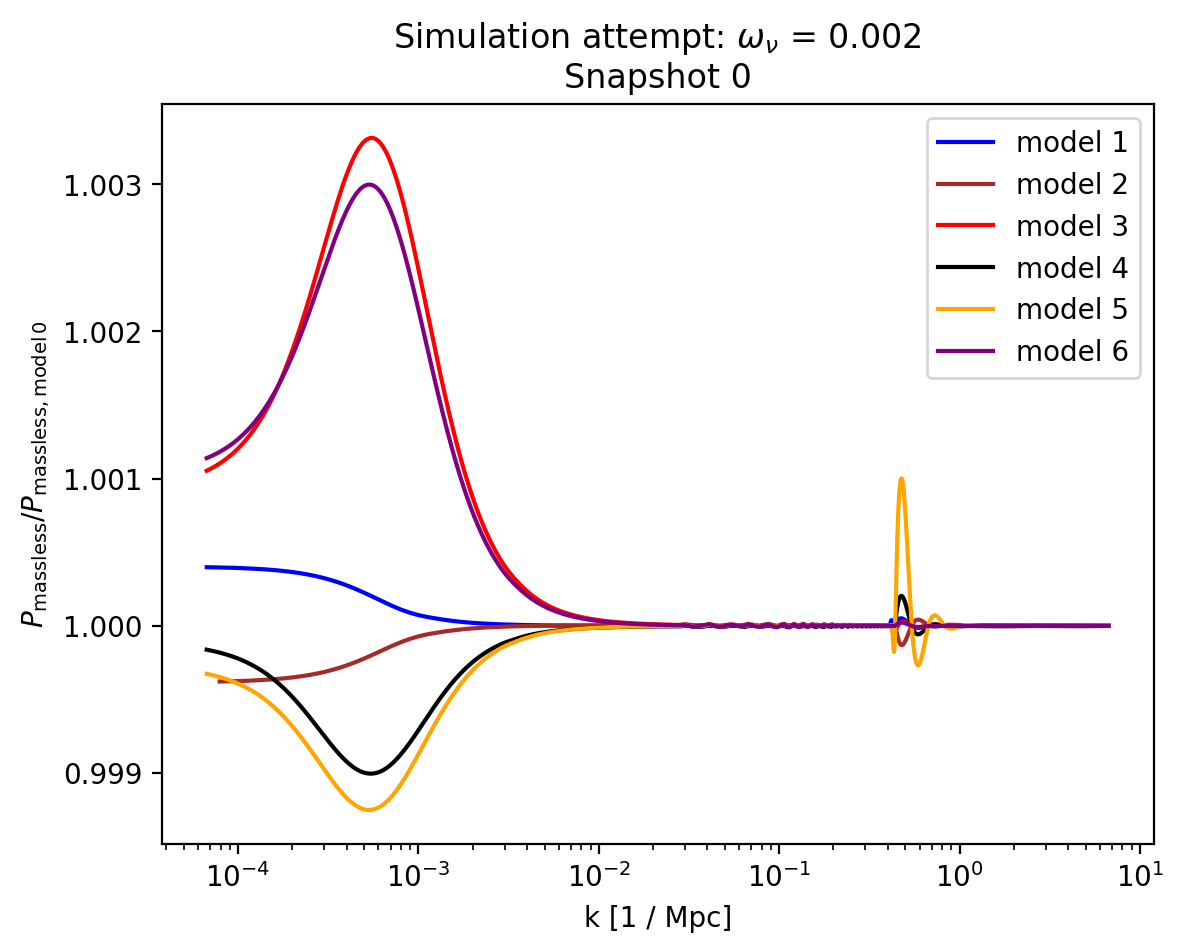

In [11]:
spectra.model_ratios(
    k_massless_list, p_massless_list, 0, "massless",
    r"Simulation attempt: $\omega_\nu$ = " + str(onh2) + "\n" + \
    "Snapshot 0", skips=[7, 8])

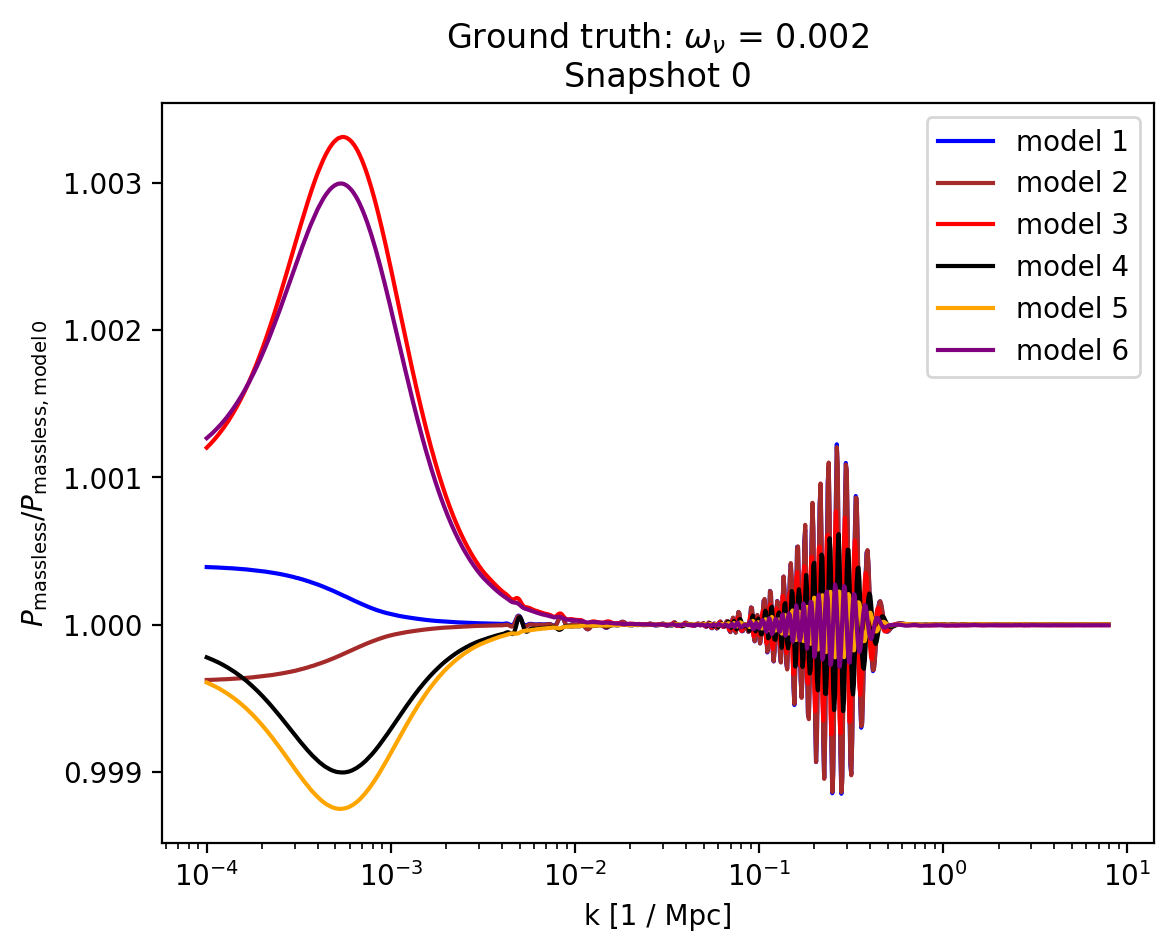

In [12]:
spectra.model_ratios_true(0, onh2_str, massive=False, skips=[7, 8])

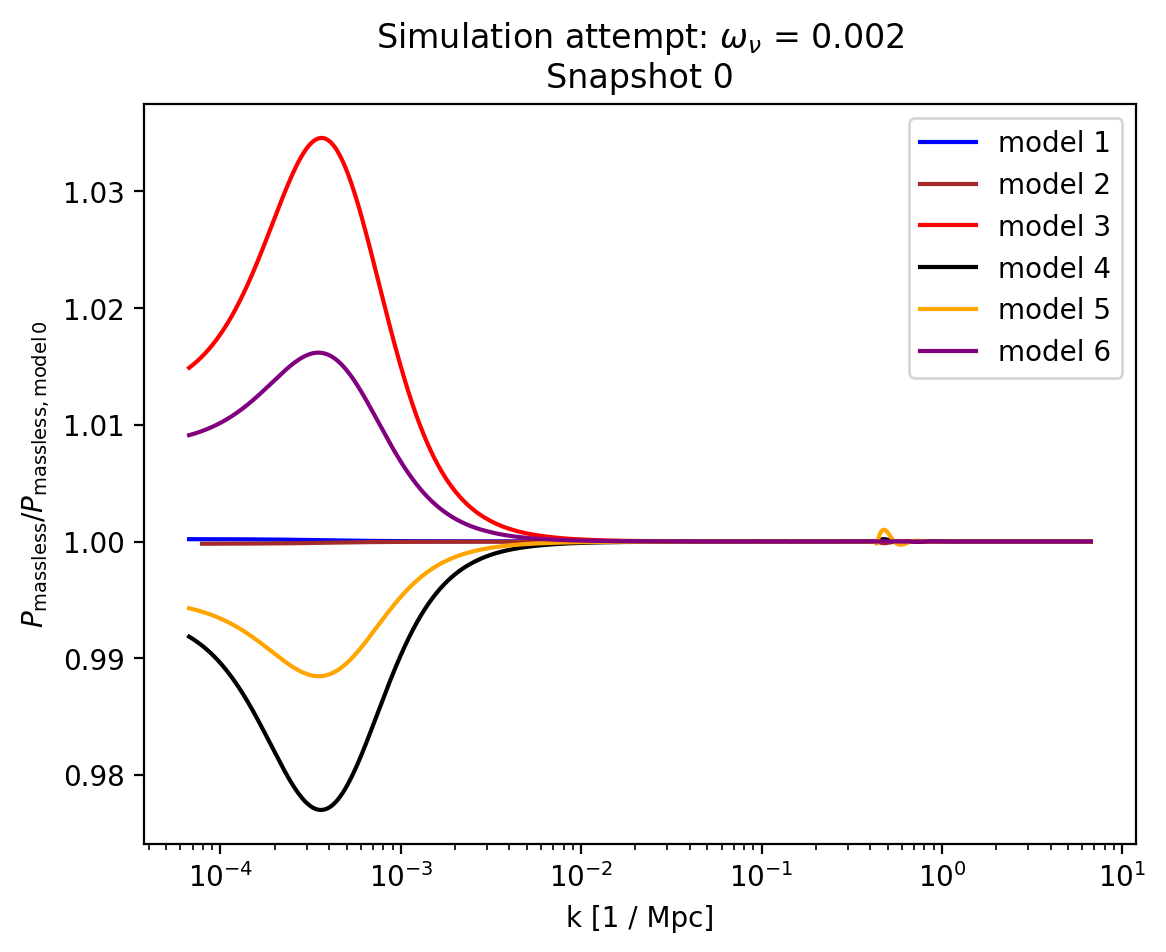

In [13]:
spectra.model_ratios(
    k_massless_list, p_massless_list, 4, "massless",
    r"Simulation attempt: $\omega_\nu$ = " + str(onh2) + "\n" + \
    "Snapshot 0", skips=[7, 8])

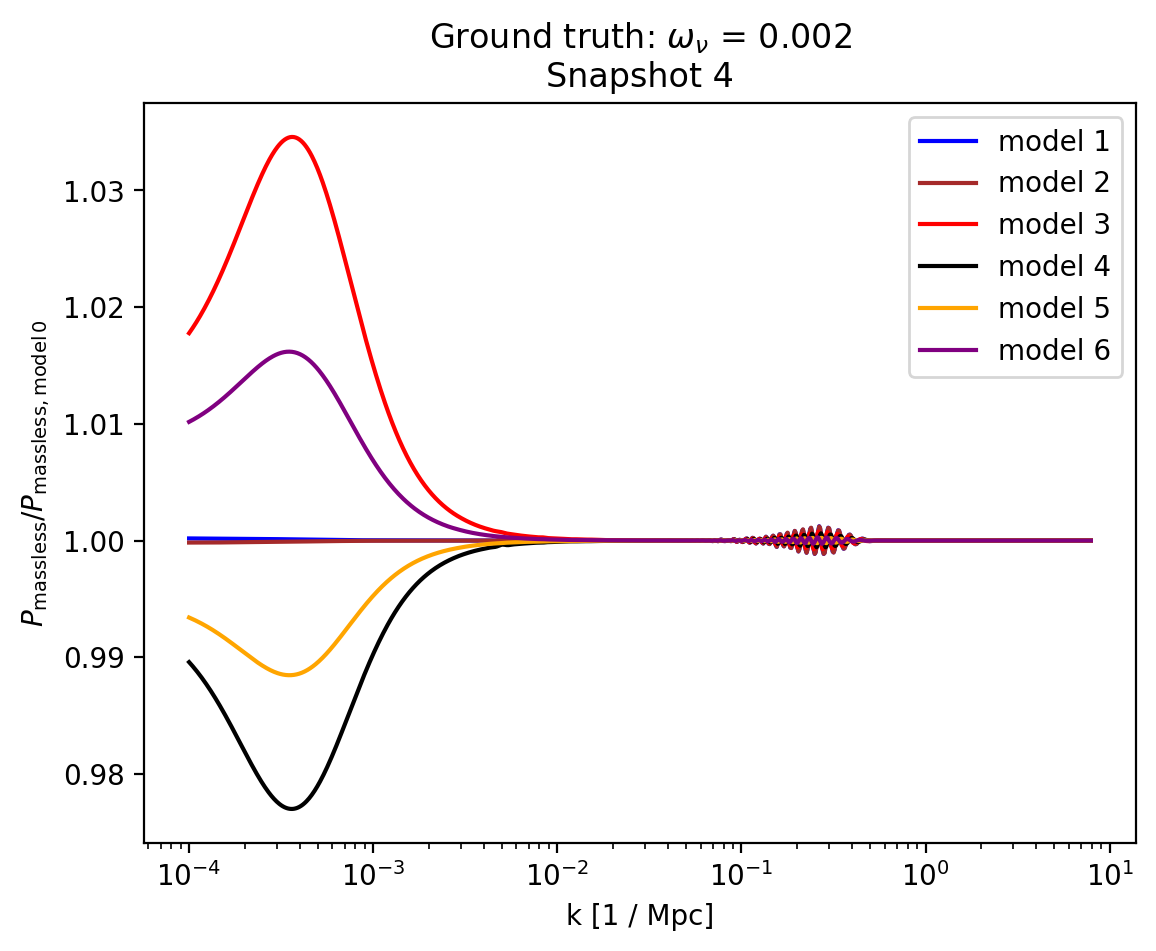

In [14]:
spectra.model_ratios_true(4, onh2_str, massive=False, skips=[7, 8])